In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [9]:
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'sex':{'female':0,'male':0}},inplace=True)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


<AxesSubplot:>

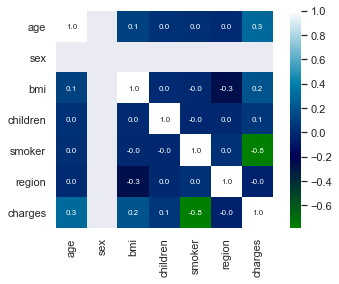

In [21]:
correlation=data.corr()
plt.figure()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='ocean')

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


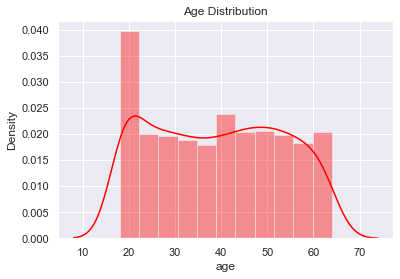

In [11]:
sns.set()
plt.figure()
sns.distplot(data.age,color='red')
plt.title('Age Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


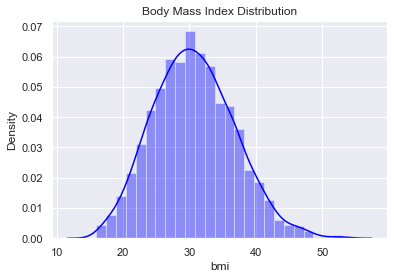

In [13]:
plt.figure()
sns.distplot(data.bmi,color='blue')
plt.title('Body Mass Index Distribution')
plt.show()

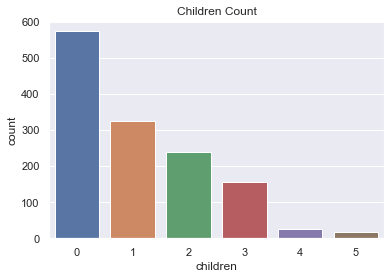

In [15]:
plt.figure()
sns.countplot(x='children',data=data)
plt.title('Children Count')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


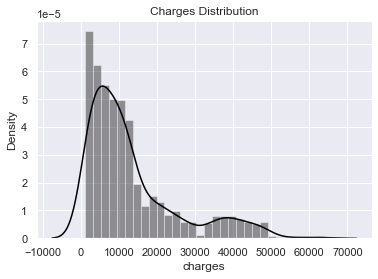

In [17]:
plt.figure()
sns.distplot(data.charges,color='black')
plt.title('Charges Distribution')
plt.show()

In [19]:
X=data.drop(['charges'],axis=1)
Y=data.charges

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
predictedTrain=model.predict(X_train)
error2=metrics.r2_score(Y_train,predictedTrain)
print("R square error: ",error2)

R square error:  0.751817467315967


In [37]:
predictedTest=model.predict(X_test)
error4=metrics.r2_score(Y_test,predictedTest)
print("R square error: ",error4)


R square error:  0.7453831948840739


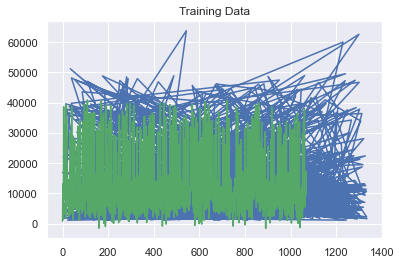

In [38]:
plt.plot(Y_train,color='b',label='Actual Price')
plt.plot(predictedTrain,color='g',label='Predicted Price')
plt.title('Training Data')
plt.show()

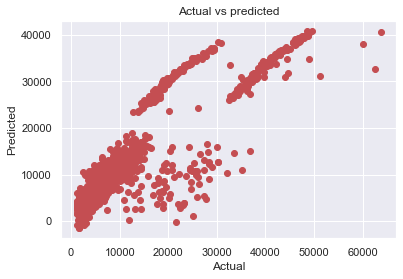

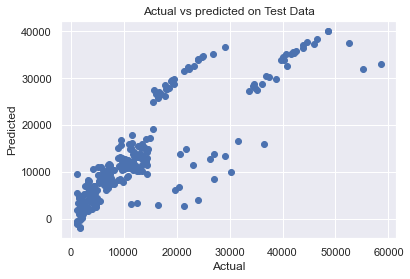

In [39]:
plt.scatter(Y_train,predictedTrain,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

plt.scatter(Y_test,predictedTest,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()